In [ ]:
%pip install tableone

  Using cached tableone-0.8.0-py3-none-any.whl (33 kB)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

%load_ext google.colab.data_table

Authenticated


In [2]:
# change this to change the right project
%env GOOGLE_CLOUD_PROJECT = sccm-datathon-2023-participant

env: GOOGLE_CLOUD_PROJECT=sccm-datathon-2023-participant


In [3]:
# example MIMIC-IV table 1 code here
%%bigquery VIRUS_demographics --project sccm-datathon-2023-participant
SELECT * FROM `sccm-discovery.VIRUS.coredata1_2` adm

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
VIRUS_demographic

In [6]:
VIRUS_demographics['sex'] = VIRUS_demographics['sex'].replace(1.0, 'Male')
VIRUS_demographics['sex'] = VIRUS_demographics['sex'].replace(2.0, 'Female')
VIRUS_demographics['sex'] = VIRUS_demographics['sex'].replace(3.0, 'Intersex')
VIRUS_demographics['sex'] = VIRUS_demographics['sex'].replace(4.0, 'Transgender')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(1.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(2.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(3.0, 'Black')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(4.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(5.0, 'White')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(6.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(7.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(8.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(9.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(10.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(11.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(12.0, 'Other')
VIRUS_demographics['race'] = VIRUS_demographics['race'].replace(12.0, 'Other')

VIRUS_demographics['ethnic_group'] = VIRUS_demographics['ethnic_group'].replace(1.0, 'Hispanic')
VIRUS_demographics['ethnic_group'] = VIRUS_demographics['ethnic_group'].replace(0.0, 'Non-Hispanic')
VIRUS_demographics['ethnic_group'] = VIRUS_demographics['ethnic_group'].replace(2.0, 'Non-Hispanic')
VIRUS_demographics['ethnic_group'] = VIRUS_demographics['ethnic_group'].replace(3.0, 'Non-Hispanic')



In [7]:
VIRUS_demographics=pd.DataFrame(VIRUS_demographics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


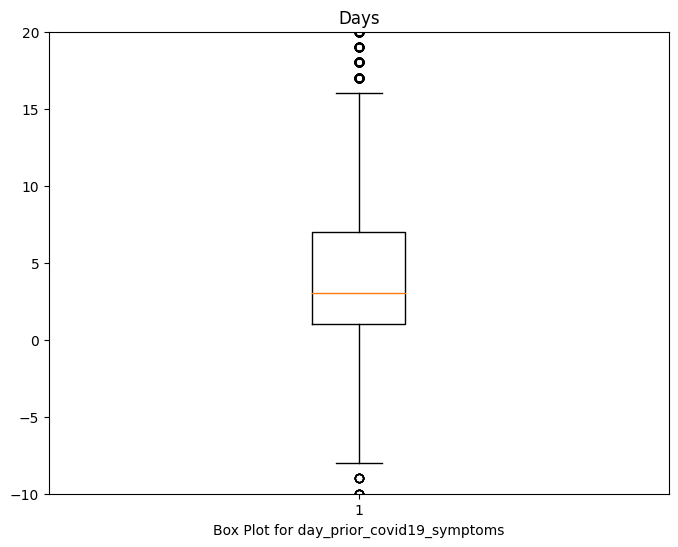

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(VIRUS_demographics['days_prior_covid_testing'].dropna())
#also day_prior_covid19_symptoms
plt.xlabel('Box Plot for day_prior_covid19_symptoms')
plt.title('Days')
plt.ylim(-10, 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Kernel Density Estimation (KDE) Plot')

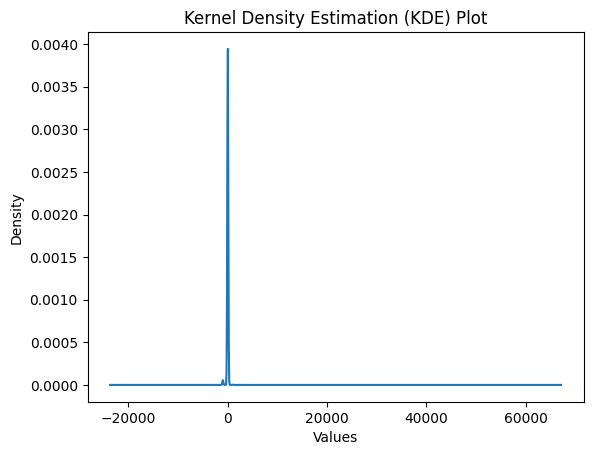

In [ ]:
VIRUS_demographics['days_prior_covid_testing'].plot.kde()

# Set plot labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot')

In [7]:


%%bigquery VIRUS_demographics --project sccm-datathon-2023-participant
SELECT * FROM `sccm-discovery.VIRUS.coredata1_2` adm

Query is running:   0%|          |

Downloading:   0%|          |

In [8]:
cols=['sex','bmi_value','WHO_Region','race','age','ethnic_group','day_prior_covid19_symptoms','days_prior_covid_testing','quarter_patient_adm']

In [10]:
VIRUS_demographics=pd.DataFrame(VIRUS_demographics)

In [11]:
newDF=VIRUS_demographics[cols]

In [12]:
newDF=newDF[newDF['days_prior_covid_testing']>0]


In [13]:
newDF=newDF[newDF['days_prior_covid_testing']<15]

In [14]:
newDF=newDF[newDF['day_prior_covid19_symptoms']>0]
newDF=newDF[newDF['day_prior_covid19_symptoms']<15]

In [15]:
from google.colab import files

csv_filename = 'output.csv'
newDF.to_csv(csv_filename, index=False)
files.download(csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


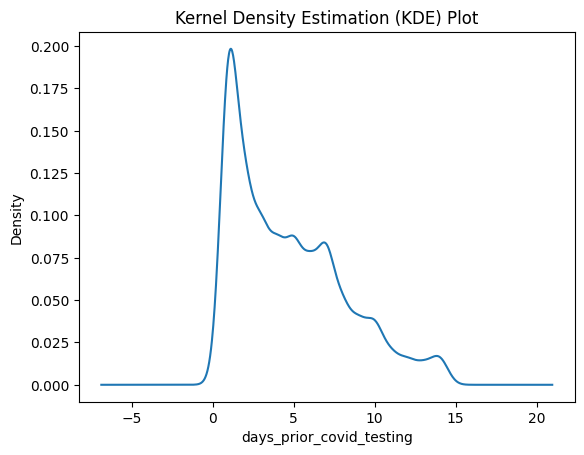

In [ ]:
newDF['days_prior_covid_testing'].plot.kde()

# Set plot labels and title
plt.xlabel('days_prior_covid_testing')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot')
plt.savefig('kde.png',dpi=300)

In [ ]:
from google.colab import files

# Download the PNG file
files.download('kde.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=tableone.tableone(
    VIRUS_demographics,
    columns = [
        'sex',
        'bmi_value',
        'WHO_Region',
        'race',
        'age',
        'ethnic_group',
        ],
    categorical = [
        'sex',
        'race',
        'WHO_Region',
        'ethnic_group',

        ],
    groupby=[
        'day_prior_covid19_symptoms', #
        ]
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = fun

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by day_prior_covid19_symptoms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
                                                                                                           Missing       Overall         -1.0        -10.0       -11.0        -12.0        -13.0        -14.0       -15.0       -18.0       -19.0         -2.0       -20.0        -21.0       -23.0       -28.0         -3.0       -30.0         -4.0         -5.0         -6.0         -7.0        -8.0        -9.0        -99.0       -990.0       -999.0     -999.99      -9999.0          0.0        0.04       0.167        0.47        0.5       0.583       0.999           1.0         1.5         10.0          11.0         12.0       120.0       121.0       128.0         13.0         14.0       141.0         15.0         16.0         17.0         18.0         19.0          2.0         20.0         21.0         22.0         23.0         24.0         25.0         26.0         27.0         28.0         29.0           3.0         3.5         30.0         31.0         32.0        33.0         34.0         35.0        36.0         37.0        38.0        39.0          4.0         40.0         41.0        42.0         43.0        44.0         45.0        46.0        47.0        48.0        49.0          5.0        50.0        52.0        55.0        57.0          6.0         60.0        66.0        67.0       68.0          7.0        71.0        77.0        78.0          8.0        84.0        85.0        86.0          9.0         90.0        95.0        97.0        99.0        999.0       9999.0      99999.0   9999999.0
n                                                                                                                          92244            9            7           2            3            4            9           1           2           1            9           1            5           1           1            8           1           12           10            7           22           7           3           24            1         1372           1            6         1825           1           1           1          2           1           1          2946           1         1484           426          395           1           1           1          207         1408           1          232          103           76           58           39         2708           86          284           31           22           19           22           23           13           36            7          3365           2          100            6            4           4            5            7           1            6   

In [ ]:
import pandas as pd
from tableone import TableOne
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset with the variables you want to compare
# Replace 'variable_name' with the actual column name containing the variable of interest
variable_name = 'race'

# Create the TableOne object
tab = TableOne(VIRUS_demographics, columns=[variable_name, 'day_prior_covid19_symptoms'])

# Generate the table
table = tab.tableone

# Access the summary statistics
summary_stats = tab._columns_summary

# Extract the min and max values
min_val = summary_stats.loc[variable_name, 'min']
max_val = summary_stats.loc[variable_name, 'max']

# Create the boxplot using matplotlib
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.boxplot(data[variable_name], notch=True, vert=False)
plt.xlabel('Values')  # Replace 'Values' with the appropriate label for your variable
plt.title('Boxplot of ' + variable_name)  # Replace 'Boxplot of' with your desired title

# Add min and max values to the plot
plt.scatter([min_val, max_val], [1, 1], marker='o', color='red', label='Min/Max')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
df.head(

)

In [ ]:
def downloadTable(df,name):
  html_content = df.to_html()

# Save the HTML content to a file
  with open(name, "w") as f:
    f.write(html_content)

# Download the HTML file
  files.download(name)

In [ ]:
downloadTable(df,"day_prior_covid19_symptoms.html")

In [ ]:
%%bigquery virus_demographics  --project sccm-datathon-2023-participant

SELECT cd12.*
  , cd7.hosp_status

FROM `sccm-discovery.VIRUS.coredata1_2` cd12
LEFT JOIN `sccm-discovery.VIRUS.coredata7` cd7 on (
  cd7.icu_id = cd12.icu_id

)


In [ ]:
virus_demographics['sex'] = virus_demographics['sex'].replace(1.0, 'Male')
virus_demographics['sex'] = virus_demographics['sex'].replace(2.0, 'Female')
virus_demographics['sex'] = virus_demographics['sex'].replace(3.0, 'Intersex')
virus_demographics['sex'] = virus_demographics['sex'].replace(4.0, 'Transgender')
virus_demographics['race'] = virus_demographics['race'].replace(1.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(2.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(3.0, 'Black')
virus_demographics['race'] = virus_demographics['race'].replace(4.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(5.0, 'White')
virus_demographics['race'] = virus_demographics['race'].replace(6.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(7.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(8.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(9.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(10.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(11.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(12.0, 'Other')
virus_demographics['race'] = virus_demographics['race'].replace(12.0, 'Other')

virus_demographics['ethnic_group'] = virus_demographics['ethnic_group'].replace(1.0, 'Hispanic')
virus_demographics['ethnic_group'] = virus_demographics['ethnic_group'].replace(0.0, 'Non-Hispanic')
virus_demographics['ethnic_group'] = virus_demographics['ethnic_group'].replace(2.0, 'Non-Hispanic')
virus_demographics['ethnic_group'] = virus_demographics['ethnic_group'].replace(3.0, 'Non-Hispanic')
virus_demographics['hosp_status'] = virus_demographics['hosp_status'].replace(0.0, 'Alive')
virus_demographics['hosp_status'] = virus_demographics['hosp_status'].replace(1.0, 'Deceased')



In [ ]:
df=tableone.tableone(
    virus_demographics,
    columns = [
        'age', 'sex',
        'bmi_value',
        'race',
        'ethnic_group',
        'hosp_status',
        ],
    categorical = [
        'sex',
        'race',
        'ethnic_group',
        'hosp_status',
        ],
    groupby =[

    ]

)
df

In [ ]:
downloadTable(df,"day_prior_covid19_symptoms.html")